<a href="https://colab.research.google.com/github/ANKIT3046/datascience-training/blob/master/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSAID Hiring Exercise

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
#

##Importing data

In [0]:
data=pd.read_csv('Churn.csv')

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the data

##Checking for null data

In [0]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##checking for duplicated data

In [0]:
data.duplicated().sum()

0

## counting the number of churn and non churn

In [0]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

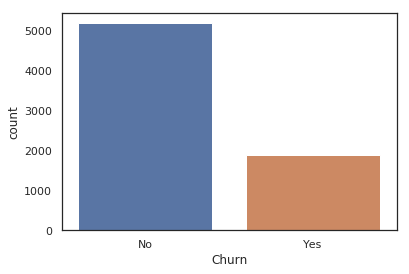

In [0]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(data["Churn"]);

(-1.1231290193657286,
 1.187873258354176,
 -1.1205789670945552,
 1.1713959271500836)

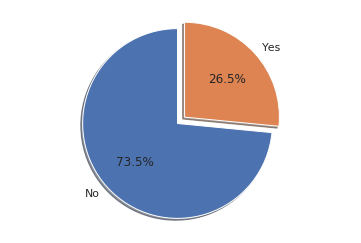

In [0]:
plt.pie(data["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',shadow=True, startangle=90,labels=data["Churn"].unique())
plt.axis('equal') 

##data cleaning

In [0]:
data.query("TotalCharges == ' '").TotalCharges.count()

11

In [0]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data.dropna(inplace = True)

In [0]:
#data.shape

In [0]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [0]:
temp_columns = [col for col in data.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [0]:
temp_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [0]:
for col in temp_columns:
    print("{} : {}".format(col,data[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [0]:
data.replace({'No internet service':'No'},inplace=True)


In [0]:
temp_tenure=np.array(data['tenure'].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


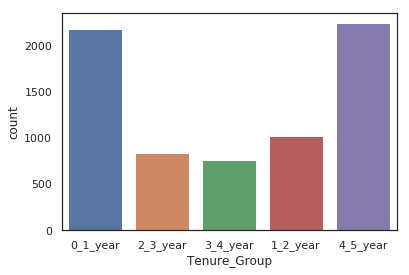

In [0]:
def tenure_to_group(data):
    if data["tenure"] <=12:
        return "0_1_year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "1_2_year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "2_3_year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "3_4_year"
    elif data["tenure"] > 48 & (data["tenure"] <= 60):
        return "4_5_year"
    elif data["tenure"] > 60 & (data["tenure"] <= 72):
        return "5_6_year"
data["Tenure_Group"] = data.apply(lambda data:tenure_to_group(data),axis = 1)
sns.countplot(data["Tenure_Group"])


# Data Visualization

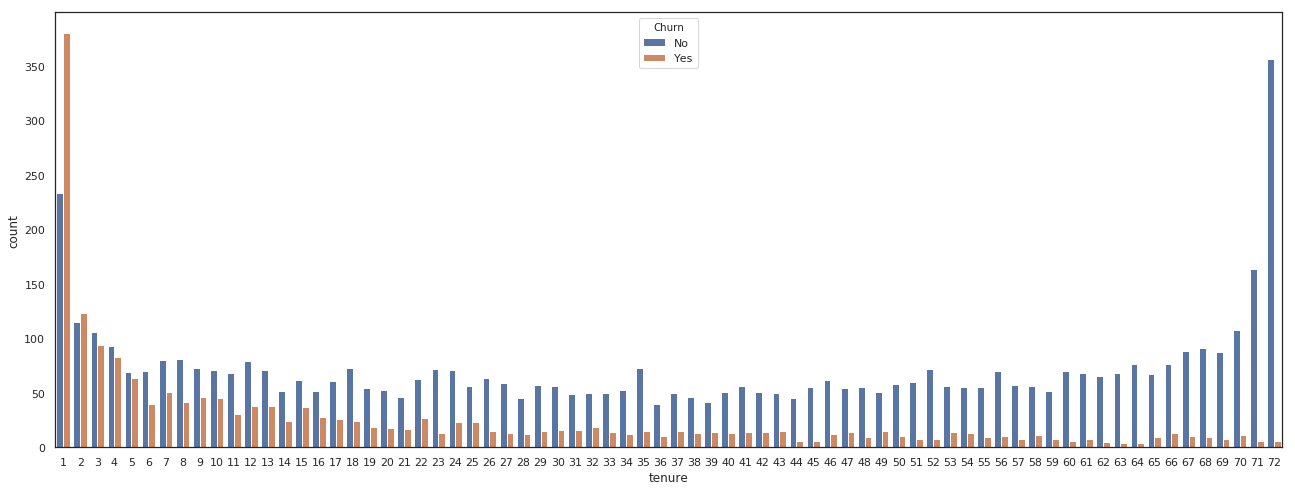

In [0]:
f, axes = plt.subplots(figsize=(22, 8))
sns.countplot(data["tenure"],hue = data["Churn"])

## above graph shows that people with less tenure are more churn then high tenure

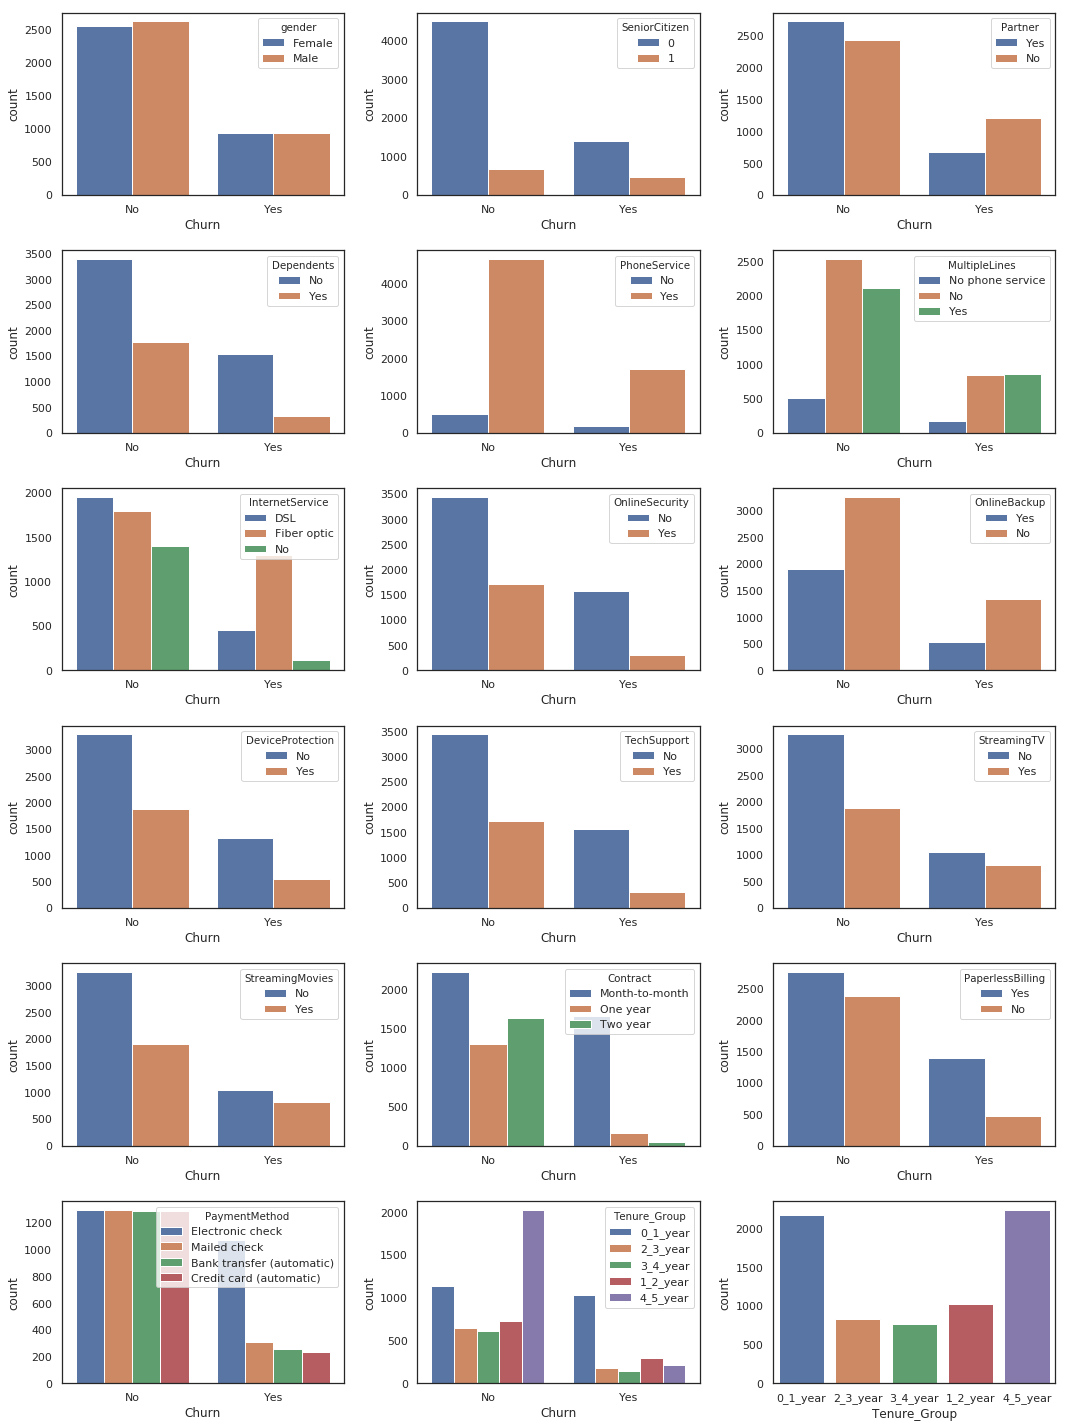

In [0]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
sns.countplot(data["Churn"],hue = data["gender"],ax = axes[0,0])
sns.countplot(data["Churn"],hue = data["SeniorCitizen"],ax = axes[0,1])
sns.countplot(data["Churn"],hue = data["Partner"],ax = axes[0,2])
sns.countplot(data["Churn"],hue = data["Dependents"],ax = axes[1,0])
sns.countplot(data["Churn"],hue = data["PhoneService"],ax = axes[1,1])
sns.countplot(data["Churn"],hue = data["MultipleLines"],ax = axes[1,2])
sns.countplot(data["Churn"],hue = data["InternetService"],ax = axes[2,0])
sns.countplot(data["Churn"],hue = data["OnlineSecurity"],ax = axes[2,1])
sns.countplot(data["Churn"],hue = data["OnlineBackup"],ax = axes[2,2])
sns.countplot(data["Churn"],hue = data["DeviceProtection"],ax = axes[3,0])
sns.countplot(data["Churn"],hue = data["TechSupport"],ax = axes[3,1])
sns.countplot(data["Churn"],hue = data["StreamingTV"],ax = axes[3,2])
sns.countplot(data["Churn"],hue = data["StreamingMovies"],ax = axes[4,0])
sns.countplot(data["Churn"],hue = data["Contract"],ax = axes[4,1])
sns.countplot(data["Churn"],hue = data["PaperlessBilling"],ax = axes[4,2])
sns.countplot(data["Churn"],hue = data["PaymentMethod"],ax = axes[5,0])
sns.countplot(data["Churn"],hue = data["Tenure_Group"],ax = axes[5,1])
sns.countplot(data["Tenure_Group"],ax = axes[5,2]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

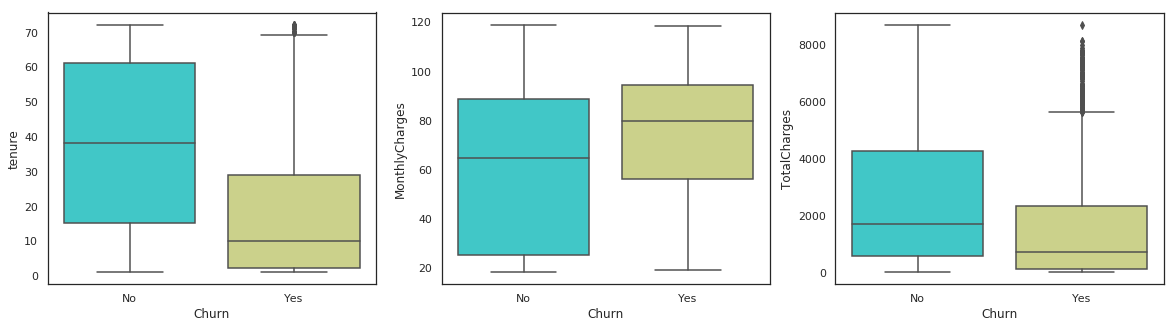

In [0]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=data,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=data,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=data,palette='rainbow',ax = axes[2])

### above graph is box plot for outlier ditection between churn and { tenure ,monthly charge and total charge}

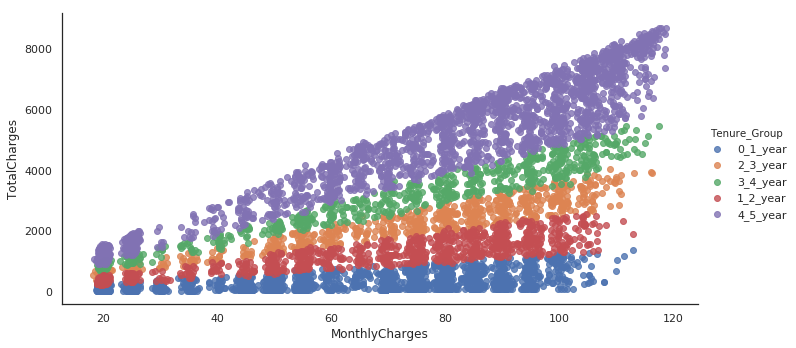

In [0]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=data,fit_reg = False,hue = "Tenure_Group",aspect=2)

### above graph shows how with increasing tenure the density of monthly charge 
### vs total charge increases significantly

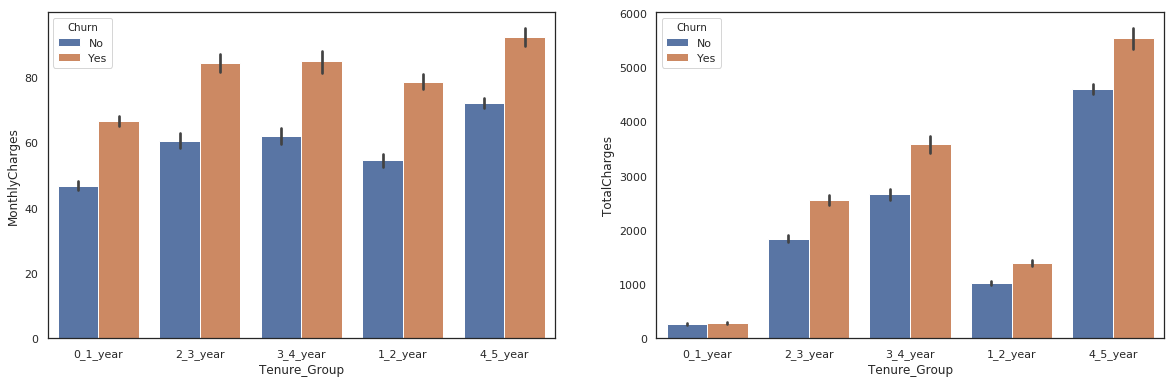

In [0]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=data,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=data,hue = "Churn",ax = axes[1])

## above graph shows how tenure group is related with monthly charge and total charge
## group with high tenure provide more benifit to company both in monthly and total

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Tenure_Group        7032 non-nul

# Data Manipulation

### >data preprocessing

In [0]:
id_customer = data["customerID"]
label=data['Churn']
label=label.apply(lambda x: 1 if x=='Yes' else 0)

In [0]:
cat_cols = [x for x in data.columns if data[x].nunique()<6 and x!="Churn"]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Tenure_Group']

In [0]:
num_cols = [x for x in data.columns if data[x].nunique()>6 and x!="customerID"]
num_cols 

['tenure', 'MonthlyCharges', 'TotalCharges']

In [0]:
## aplying minmaxscaler which scale the large valued data to certain between 0-1
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = data[num_cols])

features_log_transformed[num_cols] = data[num_cols].apply(lambda x: np.log(x + 1))

# applying min max scaler on tenure,monthelyCharges and totalcharges
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)

features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])
print(features_log_minmax_transform)

        tenure  MonthlyCharges  TotalCharges
0     0.000000        0.258016      0.072892
1     0.795650        0.602917      0.749358
2     0.112713        0.572840      0.280590
3     0.871621        0.443484      0.745063
4     0.112713        0.719396      0.335724
5     0.418111        0.904941      0.612360
6     0.678937        0.844364      0.754485
7     0.473895        0.256239      0.448361
8     0.743374        0.932241      0.827818
9     0.959046        0.595312      0.850078
10    0.540934        0.532489      0.557518
11    0.594907        0.019541      0.461346
12    0.940811        0.908733      0.930246
13    0.894800        0.926524      0.910447
14    0.713018        0.935849      0.807151
15    0.988335        0.974278      0.984333
16    0.910998        0.064279      0.648569
17    0.996166        0.941979      0.973294
18    0.473895        0.586142      0.540121
19    0.666580        0.850102      0.747029
20    0.000000        0.408934      0.118236
21    0.52

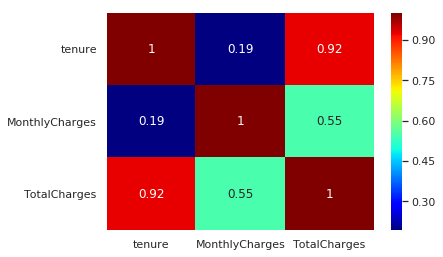

In [0]:
#plotting heatmap on for features tenure,monthlyCharges and total Charges
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [0]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [0]:
data.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
#adding scaled features to aour original dataset
data = pd.concat([data, features_log_minmax_transform], axis=1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Churn               7032 non-null object
Tenure_Group        7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
dtypes: float64(2), int64(1), o

In [0]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure_Group        0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [0]:
data.duplicated().sum()

0

In [0]:
#droping churn and customerID beacuse it is not that much importand for our test set
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

In [0]:
#using get_dummies you specify which columns you want encoded and get 
#a dataframe with original columns replaced with one-hot encodings.
data = pd.get_dummies(data = data,columns = cat_cols)
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [0]:
data.shape

(7032, 44)

In [0]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [0]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
SeniorCitizen_0                            7032 non-null uint8
SeniorCitizen_1                            7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
Multipl

In [0]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,9237-HQITU


# Implement Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.43, random_state = 42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4008 samples.
Testing set has 3024 samples.


In [0]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2223
           1       0.48      0.50      0.49       801

    accuracy                           0.73      3024
   macro avg       0.65      0.65      0.65      3024
weighted avg       0.73      0.73      0.73      3024

Area under ROC curve :  0.6548949440729452 



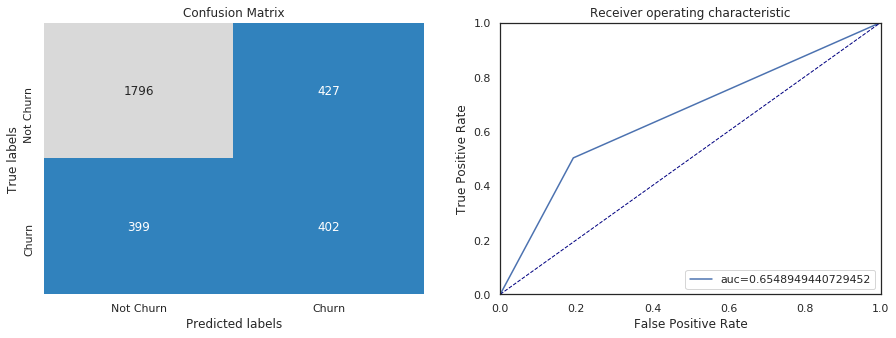

In [0]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2223
           1       0.67      0.51      0.58       801

    accuracy                           0.80      3024
   macro avg       0.75      0.71      0.72      3024
weighted avg       0.79      0.80      0.79      3024

Area under ROC curve :  0.7091970057670827 



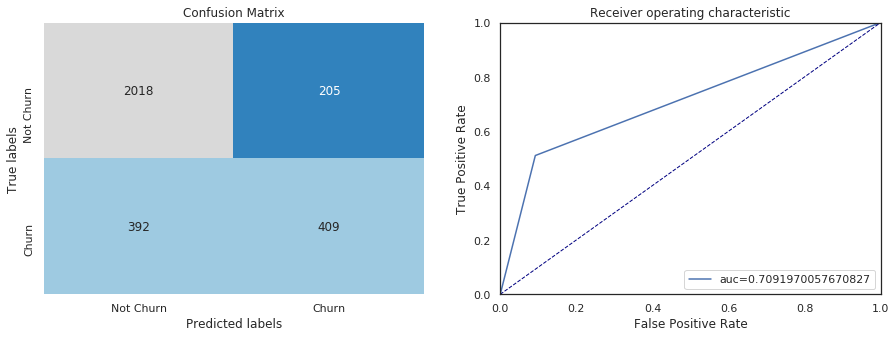

In [0]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2223
           1       0.69      0.40      0.51       801

    accuracy                           0.79      3024
   macro avg       0.75      0.67      0.69      3024
weighted avg       0.78      0.79      0.77      3024

Area under ROC curve :  0.6669623496944608 



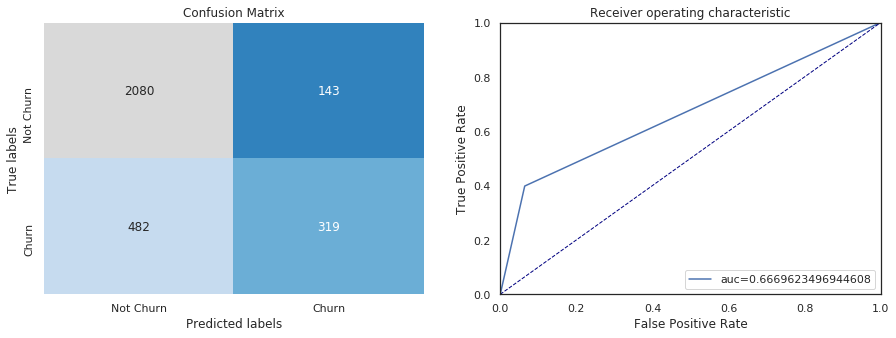

In [0]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      2223
           1       0.62      0.44      0.52       801

    accuracy                           0.78      3024
   macro avg       0.72      0.67      0.69      3024
weighted avg       0.77      0.78      0.77      3024

Area under ROC curve :  0.6716427340318528 



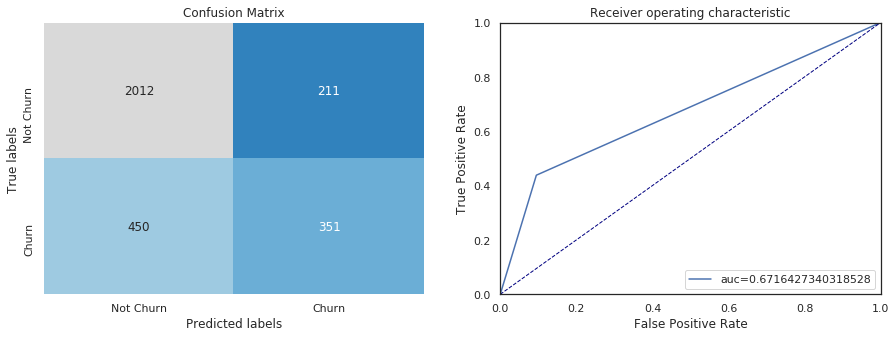

In [0]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2223
           1       0.66      0.51      0.57       801

    accuracy                           0.80      3024
   macro avg       0.75      0.71      0.72      3024
weighted avg       0.79      0.80      0.79      3024

Area under ROC curve :  0.706874504035947 



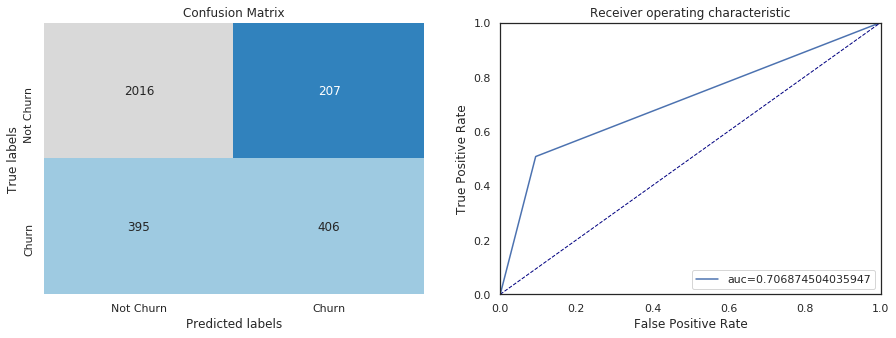

In [0]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

### >Tuning Parameters

In [0]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }


In [0]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2223
           1       0.61      0.52      0.56       801

    accuracy                           0.78      3024
   macro avg       0.72      0.70      0.71      3024
weighted avg       0.77      0.78      0.78      3024

Area under ROC curve :  0.6987722836333127 



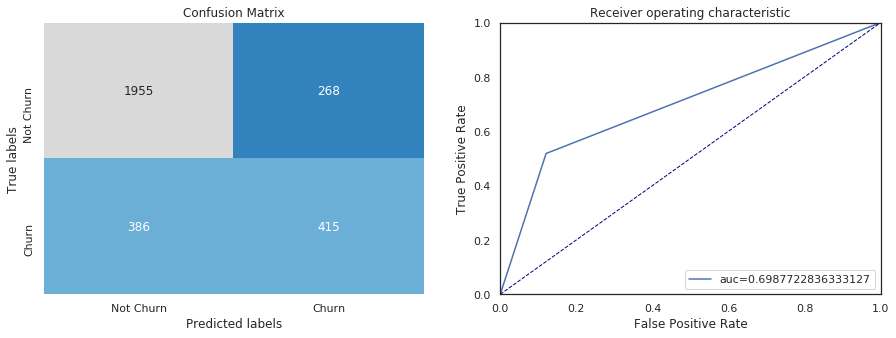

In [0]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2223
           1       0.67      0.51      0.58       801

    accuracy                           0.80      3024
   macro avg       0.76      0.71      0.73      3024
weighted avg       0.79      0.80      0.80      3024

Area under ROC curve :  0.7105465334323999 



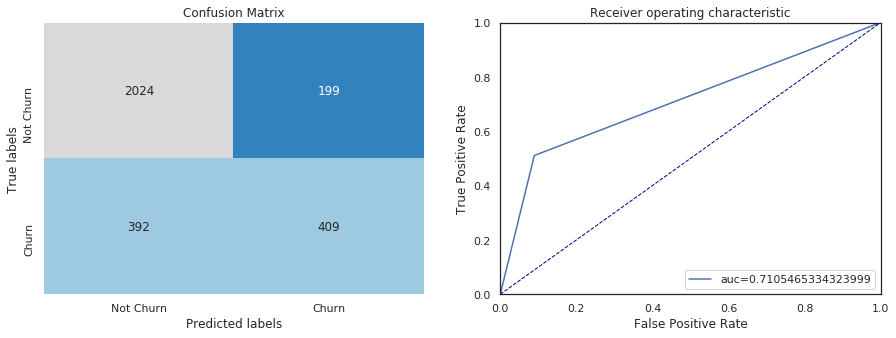

In [0]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train);
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2223
           1       0.67      0.46      0.54       801

    accuracy                           0.80      3024
   macro avg       0.75      0.69      0.71      3024
weighted avg       0.78      0.80      0.78      3024

Area under ROC curve :  0.6875287469610355 



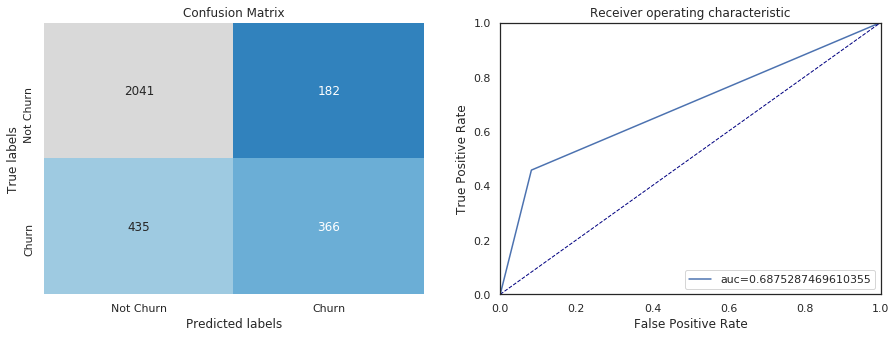

In [0]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)


 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      2223
           1       0.50      0.81      0.62       801

    accuracy                           0.74      3024
   macro avg       0.71      0.76      0.71      3024
weighted avg       0.80      0.74      0.75      3024

Area under ROC curve :  0.759296324937957 



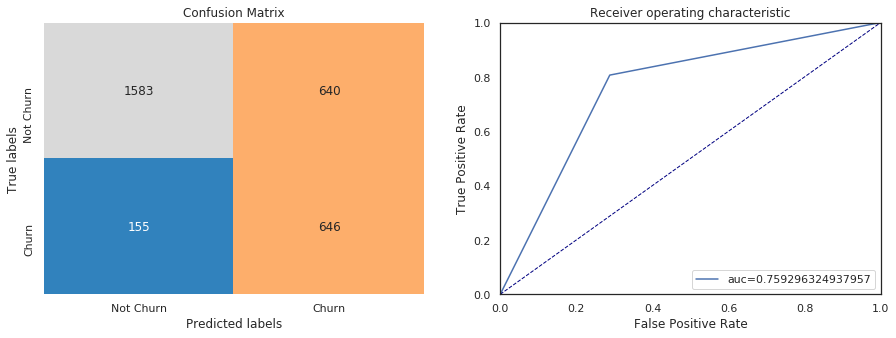

In [0]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

## upscaling

In [0]:
from sklearn.utils import resample

upsample_data = data_original

majority = upsample_data[upsample_data["Churn"]==0]
minority = upsample_data[upsample_data["Churn"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=42) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

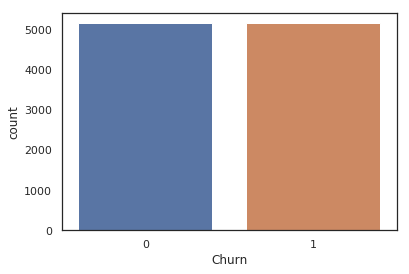

In [0]:
sns.countplot(upsample_data["Churn"])

In [0]:
id_customer_upsample = upsample_data["customerID"]
label_upsample = upsample_data["Churn"]
upsample_data.drop("Churn",inplace = True, axis = 1)
upsample_data.drop("customerID",inplace = True, axis = 1)

In [0]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 7228 samples.
Testing set has 3098 samples.



 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1571
           1       0.82      0.93      0.87      1527

    accuracy                           0.87      3098
   macro avg       0.87      0.87      0.86      3098
weighted avg       0.87      0.87      0.86      3098

Area under ROC curve :  0.8663465638869541 



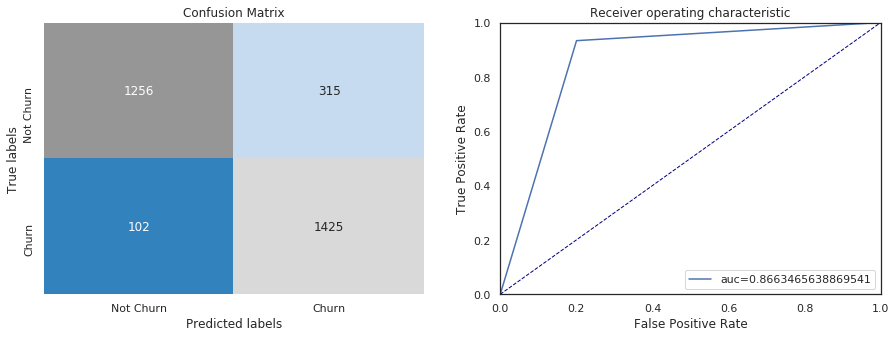

In [0]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1571
           1       0.74      0.81      0.78      1527

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098

Area under ROC curve :  0.7694876479678122 



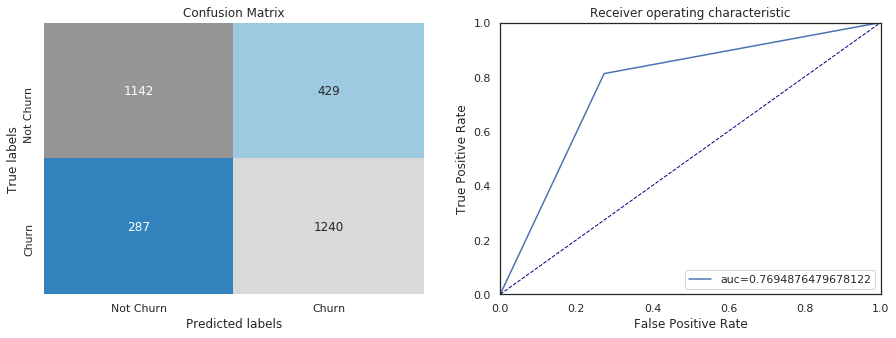

In [0]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1571
           1       0.73      0.82      0.77      1527

    accuracy                           0.76      3098
   macro avg       0.77      0.76      0.76      3098
weighted avg       0.77      0.76      0.76      3098

Area under ROC curve :  0.7635322522621666 



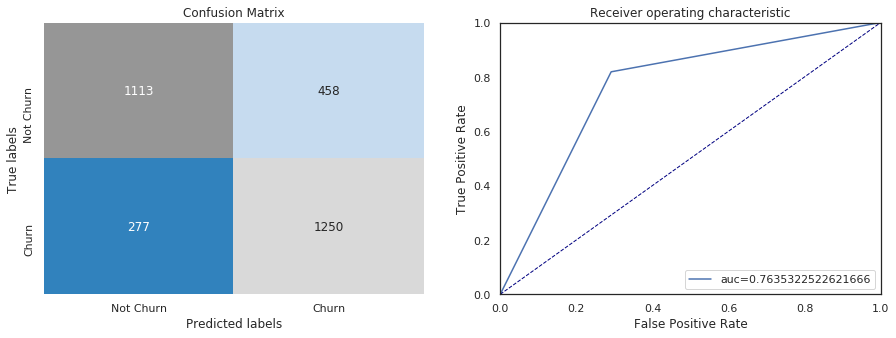

In [0]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.84      0.88      1571
           1       0.85      0.94      0.89      1527

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098

Area under ROC curve :  0.8896902227129991 



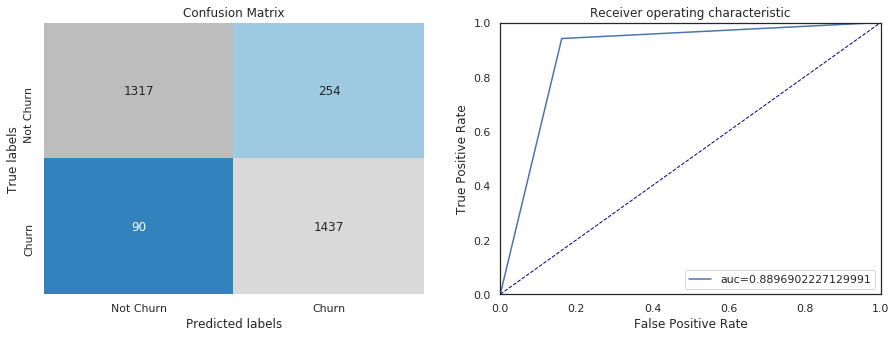

In [0]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1571
           1       0.76      0.82      0.79      1527

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098

Area under ROC curve :  0.7820560277825368 



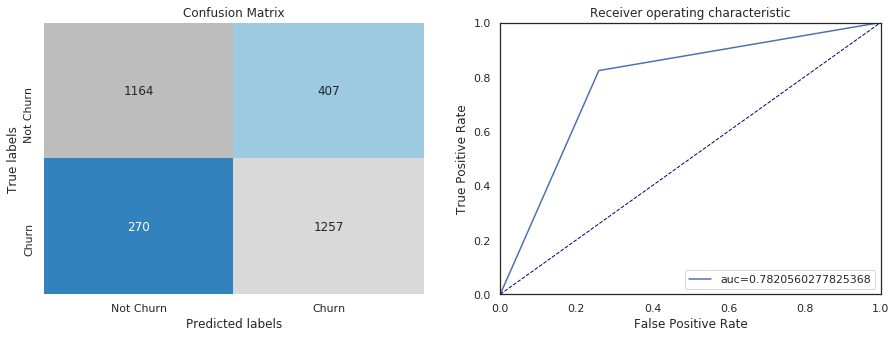

In [0]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

# Model Evaluation


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      1571
           1       0.85      0.95      0.89      1527

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098

Area under ROC curve :  0.8910274928228029 



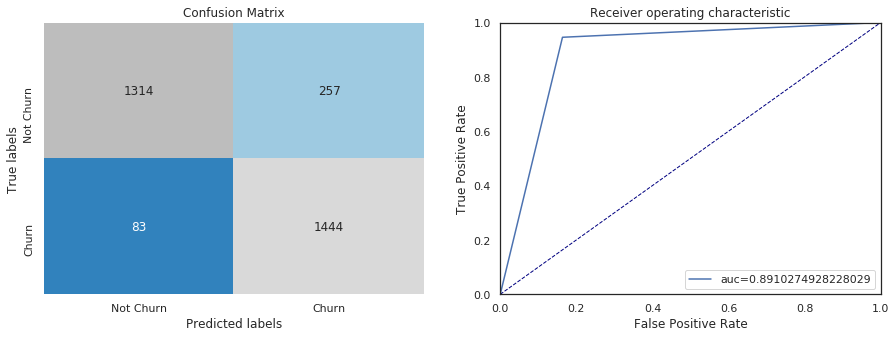

In [0]:
#we get best results with adaboost classifier
#Ada-boost classifier combines weak classifier algorithm to form strong classifier.
# A single algorithm may classify the objects poorly. But if we combine multiple clas
# selection of training set at every iteration and assigning right amount of weight in 
#final voting, we can have good accuracy score for overall classifier.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## Final Conclusions

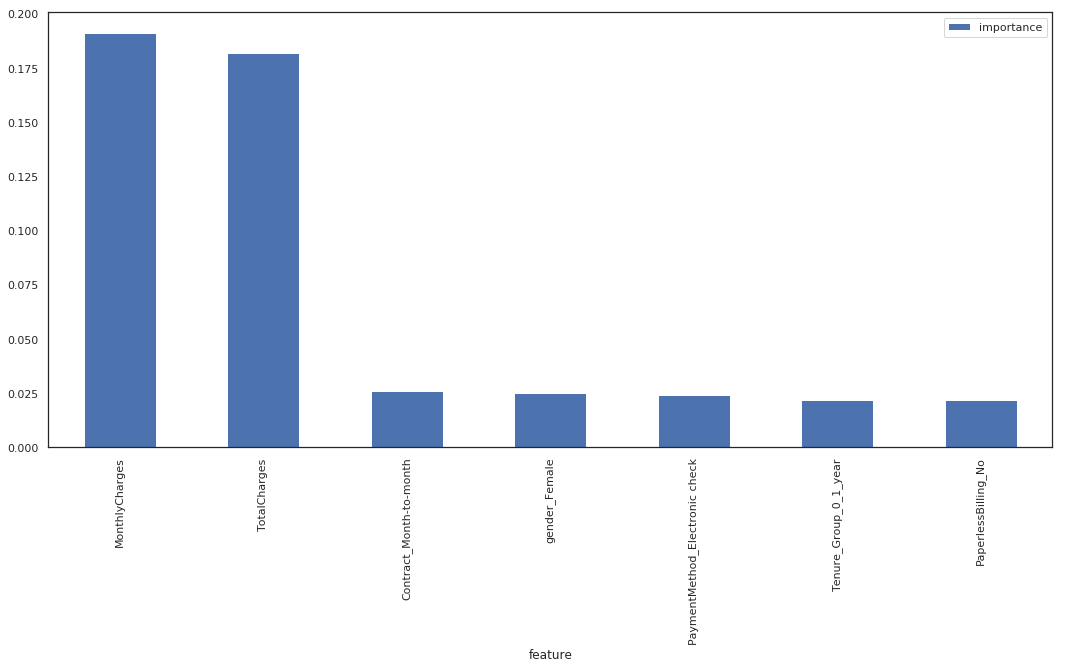

In [0]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(18, 8))

## from the importance vs feature graph we say that [montlyCharges,totalCharges,Contract_month_to_month,gender_female,payment_method_electronic check,tenure_group_0_1_year and paperlessBilling_no]
## are the feature which is always taken into consideration for any decision

### from the analysis we say that constomer is happy with month_to_month conract,electronic Payment_check method ]
### we have to improve gender eqaulity in the service and giving exiting offers to group of costomer having less then 1 year tenure ,with all this prevent churn rate in this group because churn rate is maximum in this group